# Recipe 1: Simple import and visualization

How to Script with OVITO

[Stefan Bringuier](https://stefanbringuier.info)
[](https://orcid.org/0000-0001-6753-1437)
(Materials Scientist)  
2024-02-20

In [9]:
%%capture
! pip install -U ovito

# Import OVITO modules

First we need to import the `io` and `vis` modules to create the
necessary `pipeline`, `Viewport`, and `render`.

In [20]:
from ovito.io import import_file, export_file
from ovito.vis import Viewport
from ovito.vis import TachyonRenderer, OSPRayRenderer, OpenGLRenderer

# Step 1: Import the LAMMPS dump file

Here we download a [LAMMPS data configuration file
format](https://docs.lammps.org/read_data.html) and then import it to
create a [OVITO
pipeline](https://www.ovito.org/docs/current/python/modules/ovito_pipeline.html).
You can think of pipelines as workflows or steps that get applied to a
imported file. The `add_to_scene` method just creates flag to make sure
this pipeline gets included in visualization.

In [13]:
%%capture
!wget  'https://drive.google.com/uc?id=1uN3r_QeKvCi-d5ry16zr9VTVa0SpXuM2&export=download' -O data.FCC-C60-Pillar
pipeline = import_file('data.FCC-C60-Pillar',input_format='lammps/data')
pipeline.add_to_scene()

# Step 2: Create a viewport

A `Viewport` object is what you would see if you used the GUI version of
OVITO. We will specify the type as being a [Orthographic
Projection](https://www.wikipedia.org/wiki/Orthographic_projection) and
then we can state the vector for the camera view should be. Finally we
zoom in to fit the the view port.

Much of this is a bit of an iterative process, because you need to
toggle it, check the rendered image, and then adjust as desired.

In [14]:
viewport = Viewport(type=Viewport.Type.Ortho, camera_dir=(2, 1, -1))
viewport.zoom_all()

# Step 3: Render the scene & display

Now we specify the arguments for the method `render_image` of the
`Viewport` which includes the `renderer` object itself.

In [17]:
render_args = {
    'filename': 'FCC-C60-Pillar.png',
    'background': (1.0, 1.0, 1.0),
    'renderer': OSPRayRenderer()  # Or use another renderer
}
viewport.render_image(**render_args);

> **Note**
>
> We just use the code below to display an image in a notebook.

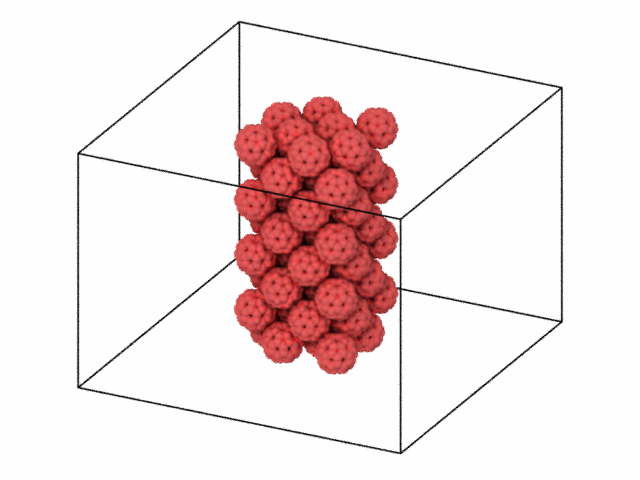

In [18]:
from IPython.display import Image
fname = 'FCC-C60-Pillar.png'
Image(open(fname, 'rb').read())

## Optional: Save a 3D Model

A nice feature is we can save a 3D model representation of our
frame/viewport and then manipulate it in real-time in a browser or
powerpoint.

In [19]:
export_file(pipeline,file="FCC-C60-Pillar.glb",format="gltf")